In [1]:
#moutn to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! unzip '/content/drive/MyDrive/HAM10000_metadata_augmented_gc.zip'

Archive:  /content/drive/MyDrive/HAM10000_metadata_augmented_gc.zip
  inflating: HAM10000_metadata_augmented.csv  


In [ ]:
! unzip '/content/drive/MyDrive/HAM10000_images_augmented_gc.zip'

In [4]:
#import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [5]:
! unzip '/content/drive/MyDrive/HAM10000_metadata_gc.zip'

Archive:  /content/drive/MyDrive/HAM10000_metadata_gc.zip
  inflating: HAM10000_metadata       


In [ ]:
! unzip '/content/drive/MyDrive/HAM10000_images_part_1_gc'

In [ ]:
! unzip '/content/drive/MyDrive/HAM10000_images_part_2_gc'

In [8]:
#load and examine datasets

In [9]:
md = pd.read_csv("/content/HAM10000_metadata")
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [10]:
mdau = pd.read_csv("/content/HAM10000_metadata_augmented.csv")
mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented
1,0,ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented
...,...,...,...,...,...,...,...,...,...
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented
6003,0,ISIC_00323293,HAM_0005027,akiec,histo,85.0,female,back,Augmented
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented


In [11]:
#labels based on disease categories (numerical)
lab_enc = LabelEncoder()
lab_enc.fit(md['dx'])
LabelEncoder()
print(list(lab_enc.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [12]:
md['label'] = lab_enc.transform(md["dx"]) 

In [13]:
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,0


In [14]:
# akiec = 0, bcc = 1, bkl = 2, df = 3, mel = 4, nv = 5, vasc = 6
# mapping

In [15]:
md.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dataset          object
label             int64
dtype: object

In [16]:
#mapping - labels for augmented data set

In [17]:
def aug_label(row):
  if row['dx'] == 'akiec':
    return 0
  elif row['dx'] == 'bcc':
    return 1
  elif row['dx'] == 'bkl':
    return 2
  elif row['dx'] == 'df':
    return 3
  elif row['dx'] == 'mel':
    return 4
  elif row['dx'] == 'nv':
    return 5
  elif row['dx'] == 'vasc':
    return 6
  else:
    return None

In [18]:
mdau['label'] = mdau.apply(lambda row: aug_label(row), axis=1)
mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2
1,0,ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2
...,...,...,...,...,...,...,...,...,...,...
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0
6003,0,ISIC_00323293,HAM_0005027,akiec,histo,85.0,female,back,Augmented,0
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0


In [19]:
#add image paths to dataset and use image paths to make ndarrays of images

In [20]:
fldr1 = '/content/HAM10000_images_part_1'
fldr2 = '/content/HAM10000_images_part_2'

im_paths = []

for i in md['image_id']:
  fid = i

  fn = '/' + fid + '.jpg'

  if os.path.isfile(fldr1 + fn) == True:
    im_paths.append(fldr1+fn)
  else:
    im_paths.append(fldr2+fn)

In [21]:
md['image_paths'] = im_paths
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0032854.jpg


In [22]:
fldr_aug = '/content/HAM10000_images_augmented'

im_path_aug = []

for i in mdau['image_id']:
  fid_aug = i

  fn_aug = '/' + fid_aug + '.jpg'
  if os.path.isfile(fldr_aug+fn_aug) == True:
    im_path_aug.append(fldr_aug+fn_aug)
  else:
    im_path_aug.append('other')

In [23]:
mdau['image_paths'] = im_path_aug
mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label,image_paths
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002741...
1,0,ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002503...
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002676...
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002566...
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_003163...
...,...,...,...,...,...,...,...,...,...,...,...
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0,/content/HAM10000_images_augmented/ISIC_002779...
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_002491...
6003,0,ISIC_00323293,HAM_0005027,akiec,histo,85.0,female,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_003232...
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0,/content/HAM10000_images_augmented/ISIC_003119...


In [24]:
#image resizing
im_size = 224

In [25]:
md['image'] = md['image_paths'].map(lambda x: np.asarray(Image.open(x).resize((im_size,im_size))))
md

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0027419.jpg,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025030.jpg,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0026769.jpg,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0025661.jpg,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0031633.jpg,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033084.jpg,"[[[115, 92, 101], [108, 92, 96], [108, 91, 98]..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033550.jpg,"[[[4, 6, 3], [5, 6, 3], [6, 6, 5], [7, 8, 4], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0033536.jpg,"[[[105, 92, 96], [109, 102, 103], [118, 109, 1..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,0,/content/HAM10000_images_part_2/ISIC_0032854.jpg,"[[[156, 115, 138], [158, 117, 138], [160, 121,..."


In [26]:
mdau['image'] = mdau['image_paths'].map(lambda x: np.asarray(Image.open(x).resize((im_size,im_size))))
mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002741...,"[[[240, 240, 240], [240, 240, 240], [240, 240,..."
1,0,ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002503...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002676...,"[[[39, 39, 39], [39, 39, 39], [39, 39, 39], [3..."
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002566...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_003163...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0,/content/HAM10000_images_augmented/ISIC_002779...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_002491...,"[[[115, 80, 85], [176, 116, 126], [182, 111, 1..."
6003,0,ISIC_00323293,HAM_0005027,akiec,histo,85.0,female,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_003232...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0,/content/HAM10000_images_augmented/ISIC_003119...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [27]:
#create test train split

In [28]:
train, test = train_test_split(md, test_size=0.25, random_state=29, shuffle=True)

In [29]:
test

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image
59,HAM_0000728,ISIC_0025286,bkl,histo,50.0,male,lower extremity,rosendahl,2,/content/HAM10000_images_part_1/ISIC_0025286.jpg,"[[[151, 127, 149], [139, 114, 134], [135, 109,..."
8963,HAM_0000762,ISIC_0027137,nv,histo,30.0,female,back,rosendahl,5,/content/HAM10000_images_part_1/ISIC_0027137.jpg,"[[[157, 140, 130], [161, 144, 133], [162, 145,..."
168,HAM_0003845,ISIC_0033601,bkl,histo,40.0,female,trunk,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0033601.jpg,"[[[109, 91, 104], [111, 94, 108], [116, 97, 10..."
6519,HAM_0002331,ISIC_0028068,nv,follow_up,35.0,female,lower extremity,vidir_molemax,5,/content/HAM10000_images_part_1/ISIC_0028068.jpg,"[[[217, 125, 139], [217, 126, 140], [218, 125,..."
4968,HAM_0004498,ISIC_0025586,nv,follow_up,35.0,male,upper extremity,vidir_molemax,5,/content/HAM10000_images_part_1/ISIC_0025586.jpg,"[[[224, 135, 147], [225, 136, 149], [226, 136,..."
...,...,...,...,...,...,...,...,...,...,...,...
2220,HAM_0001964,ISIC_0032149,mel,histo,50.0,male,neck,rosendahl,4,/content/HAM10000_images_part_2/ISIC_0032149.jpg,"[[[121, 86, 76], [120, 86, 74], [122, 87, 75],..."
6928,HAM_0001849,ISIC_0027209,nv,histo,10.0,female,lower extremity,vidir_modern,5,/content/HAM10000_images_part_1/ISIC_0027209.jpg,"[[[166, 132, 140], [174, 141, 148], [179, 146,..."
3978,HAM_0006474,ISIC_0030262,nv,follow_up,40.0,female,trunk,vidir_molemax,5,/content/HAM10000_images_part_2/ISIC_0030262.jpg,"[[[238, 154, 149], [241, 156, 153], [239, 157,..."
9096,HAM_0001730,ISIC_0030856,nv,histo,65.0,female,back,rosendahl,5,/content/HAM10000_images_part_2/ISIC_0030856.jpg,"[[[129, 80, 89], [128, 78, 86], [132, 79, 84],..."


In [ ]:
#exclusion of augmented data from test
og_im_id = []

for i in mdau['image_id']:
  stl = len(i)
  if stl == 13:
    og_im = i.rstrip(i[-1])
    og_im_id.append(og_im)
  else:
    og_im = i
    og_im_id.append(og_im)

og_im_id  

In [31]:
mdau['OG_Image_ID'] = og_im_id
mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image,OG_Image_ID
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002741...,"[[[240, 240, 240], [240, 240, 240], [240, 240,...",ISIC_0027419
1,0,ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002503...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0025030
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002676...,"[[[39, 39, 39], [39, 39, 39], [39, 39, 39], [3...",ISIC_0026769
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002566...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0025661
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_003163...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ISIC_0031633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0,/content/HAM10000_images_augmented/ISIC_002779...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0027795
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_002491...,"[[[115, 80, 85], [176, 116, 126], [182, 111, 1...",ISIC_002491
6003,0,ISIC_00323293,HAM_0005027,akiec,histo,85.0,female,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_003232...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0032329
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0,/content/HAM10000_images_augmented/ISIC_003119...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0031198


In [32]:
cond = mdau['OG_Image_ID'].isin(test['image_id'])
mdau.drop(mdau[cond].index, inplace=True)

mdau

,Unnamed: 0,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image,OG_Image_ID
0,0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002741...,"[[[240, 240, 240], [240, 240, 240], [240, 240,...",ISIC_0027419
2,0,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002676...,"[[[39, 39, 39], [39, 39, 39], [39, 39, 39], [3...",ISIC_0026769
3,0,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002566...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0025661
4,0,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_003163...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ISIC_0031633
5,0,ISIC_0027850,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_002785...,"[[[250, 250, 250], [250, 250, 250], [250, 250,...",ISIC_0027850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,0,ISIC_00334563,HAM_0002615,akiec,histo,70.0,male,scalp,Augmented,0,/content/HAM10000_images_augmented/ISIC_003345...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0033456
6001,0,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0,/content/HAM10000_images_augmented/ISIC_002779...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0027795
6002,0,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_002491...,"[[[115, 80, 85], [176, 116, 126], [182, 111, 1...",ISIC_002491
6004,0,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0,/content/HAM10000_images_augmented/ISIC_003119...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",ISIC_0031198


In [33]:
aug = mdau.drop('OG_Image_ID', axis=1)

In [34]:
aug.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
aug

,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image
0,ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002741...,"[[[240, 240, 240], [240, 240, 240], [240, 240,..."
2,ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002676...,"[[[39, 39, 39], [39, 39, 39], [39, 39, 39], [3..."
3,ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,Augmented,2,/content/HAM10000_images_augmented/ISIC_002566...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_003163...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,ISIC_0027850,HAM_0001466,bkl,histo,75.0,male,ear,Augmented,2,/content/HAM10000_images_augmented/ISIC_002785...,"[[[250, 250, 250], [250, 250, 250], [250, 250,..."
...,...,...,...,...,...,...,...,...,...,...,...
5999,ISIC_00334563,HAM_0002615,akiec,histo,70.0,male,scalp,Augmented,0,/content/HAM10000_images_augmented/ISIC_003345...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6001,ISIC_00277953,HAM_0001526,akiec,histo,70.0,male,ear,Augmented,0,/content/HAM10000_images_augmented/ISIC_002779...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6002,ISIC_00249133,HAM_0001495,akiec,histo,85.0,male,back,Augmented,0,/content/HAM10000_images_augmented/ISIC_002491...,"[[[115, 80, 85], [176, 116, 126], [182, 111, 1..."
6004,ISIC_00311983,HAM_0003422,akiec,histo,55.0,female,neck,Augmented,0,/content/HAM10000_images_augmented/ISIC_003119...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [36]:
train

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,image_paths,image
7880,HAM_0006334,ISIC_0032605,nv,histo,40.0,female,back,vidir_modern,5,/content/HAM10000_images_part_2/ISIC_0032605.jpg,"[[[233, 201, 224], [231, 200, 230], [229, 198,..."
8169,HAM_0007096,ISIC_0024674,nv,histo,40.0,male,lower extremity,vienna_dias,5,/content/HAM10000_images_part_1/ISIC_0024674.jpg,"[[[227, 201, 237], [226, 200, 237], [227, 199,..."
6448,HAM_0007449,ISIC_0025912,nv,follow_up,45.0,male,back,vidir_molemax,5,/content/HAM10000_images_part_1/ISIC_0025912.jpg,"[[[210, 109, 103], [211, 112, 103], [207, 108,..."
9013,HAM_0000104,ISIC_0032186,nv,histo,65.0,male,back,rosendahl,5,/content/HAM10000_images_part_2/ISIC_0032186.jpg,"[[[172, 118, 131], [173, 118, 131], [176, 118,..."
8905,HAM_0006174,ISIC_0028116,nv,histo,75.0,male,back,rosendahl,5,/content/HAM10000_images_part_1/ISIC_0028116.jpg,"[[[151, 122, 112], [154, 125, 121], [154, 125,..."
...,...,...,...,...,...,...,...,...,...,...,...
9585,HAM_0004184,ISIC_0032634,nv,consensus,40.0,female,unknown,vidir_modern,5,/content/HAM10000_images_part_2/ISIC_0032634.jpg,"[[[189, 178, 230], [191, 181, 237], [194, 182,..."
864,HAM_0003920,ISIC_0026351,bkl,consensus,55.0,male,face,vidir_modern,2,/content/HAM10000_images_part_1/ISIC_0026351.jpg,"[[[52, 24, 35], [68, 28, 41], [68, 31, 44], [7..."
808,HAM_0000835,ISIC_0030394,bkl,confocal,55.0,female,face,vidir_modern,2,/content/HAM10000_images_part_2/ISIC_0030394.jpg,"[[[149, 116, 129], [150, 119, 130], [151, 120,..."
6380,HAM_0006682,ISIC_0027778,nv,follow_up,30.0,female,trunk,vidir_molemax,5,/content/HAM10000_images_part_1/ISIC_0027778.jpg,"[[[235, 146, 149], [234, 146, 147], [236, 147,..."


In [37]:
#standardize arrays and create arrays to represent output labels 

In [38]:
trainX = np.array(train["image"].tolist())
trainX = trainX/225

augX = np.array(aug["image"].tolist())
augX = augX/225

tr_in = np.concatenate((trainX, augX), axis=0)
tr_in

array([[[[1.03555556, 0.89333333, 0.99555556],
         [1.02666667, 0.88888889, 1.02222222],
         [1.01777778, 0.88      , 1.01777778],
         ...,
         [0.93333333, 0.76888889, 0.84888889],
         [0.93333333, 0.78666667, 0.87555556],
         [0.93333333, 0.79555556, 0.88888889]],

        [[1.04      , 0.88444444, 1.        ],
         [1.02222222, 0.88888889, 1.00444444],
         [1.02666667, 0.89333333, 1.01333333],
         ...,
         [0.95555556, 0.79555556, 0.87111111],
         [0.94666667, 0.8       , 0.88444444],
         [0.94222222, 0.8       , 0.88888889]],

        [[1.03111111, 0.88      , 0.99555556],
         [1.02666667, 0.88444444, 1.01333333],
         [1.03111111, 0.89333333, 1.00888889],
         ...,
         [0.95111111, 0.79555556, 0.86666667],
         [0.94666667, 0.8       , 0.87555556],
         [0.95111111, 0.79111111, 0.88      ]],

        ...,

        [[1.03555556, 0.87555556, 0.99555556],
         [1.02666667, 0.87111111, 0.98222222]

In [39]:
trainY = train['label']
trainY_dx = to_categorical(trainY, num_classes=7)

augY = aug['label']
augY_dx = to_categorical(augY, num_classes=7)

tr_out = np.concatenate((trainY_dx, augY_dx), axis=0)
tr_out

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
testX = np.array(test["image"].tolist())
testX = testX/225

testY = test['label']
testY_dx = to_categorical(testY, num_classes=7)

In [41]:
#model - 3 convolutional layers with pooling layers and dropout layers, then two dense layers ending in softmax activation
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(im_size, im_size, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

In [42]:
#model hyperparameters and model fitting

batch_size = 16 
epochs = 75

In [43]:
mod_fit = model.fit(
    tr_in, tr_out,
    epochs=epochs,
    batch_size = batch_size,
    verbose=2)

Epoch 1/75
754/754 - 30s - loss: 1.4207 - acc: 0.4804 - 30s/epoch - 40ms/step
Epoch 2/75
754/754 - 18s - loss: 1.2203 - acc: 0.5333 - 18s/epoch - 25ms/step
Epoch 3/75
754/754 - 19s - loss: 1.1425 - acc: 0.5553 - 19s/epoch - 25ms/step
Epoch 4/75
754/754 - 18s - loss: 1.1156 - acc: 0.5641 - 18s/epoch - 24ms/step
Epoch 5/75
754/754 - 18s - loss: 1.0840 - acc: 0.5806 - 18s/epoch - 24ms/step
Epoch 6/75
754/754 - 18s - loss: 1.0639 - acc: 0.5820 - 18s/epoch - 24ms/step
Epoch 7/75
754/754 - 18s - loss: 1.0298 - acc: 0.6001 - 18s/epoch - 24ms/step
Epoch 8/75
754/754 - 18s - loss: 1.0152 - acc: 0.6056 - 18s/epoch - 24ms/step
Epoch 9/75
754/754 - 18s - loss: 0.9812 - acc: 0.6187 - 18s/epoch - 24ms/step
Epoch 10/75
754/754 - 18s - loss: 0.9745 - acc: 0.6238 - 18s/epoch - 24ms/step
Epoch 11/75
754/754 - 18s - loss: 0.9413 - acc: 0.6380 - 18s/epoch - 24ms/step
Epoch 12/75
754/754 - 18s - loss: 0.9254 - acc: 0.6453 - 18s/epoch - 24ms/step
Epoch 13/75
754/754 - 18s - loss: 0.9140 - acc: 0.6541 - 18s/

In [44]:
#overall accuracy. predictions, and class-wise accuracies

In [45]:
mod_acc = model.evaluate(testX, testY_dx)
print('Test Accuracy: ', mod_acc[1])

79/79 [==============================] - 2s 21ms/step - loss: 1.3792 - acc: 0.6921
Test Accuracy:  0.6920926570892334


In [46]:
y_preds = model.predict(testX)

79/79 [==============================] - 2s 19ms/step


In [47]:
y_pred_classes = np.argmax(y_preds, axis=1)

In [48]:
y_true = np.argmax(testY_dx, axis=1)

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names = ['Akiec', 'Bcc', 'Bkl', 'Df', 'Mel', 'Nv', 'Vasc'])
print(report)

              precision    recall  f1-score   support

       Akiec       0.24      0.14      0.18        91
         Bcc       0.34      0.20      0.25       132
         Bkl       0.42      0.24      0.31       271
          Df       0.25      0.30      0.27        30
         Mel       0.37      0.20      0.26       277
          Nv       0.77      0.93      0.84      1669
        Vasc       0.68      0.50      0.58        34

    accuracy                           0.69      2504
   macro avg       0.44      0.36      0.38      2504
weighted avg       0.64      0.69      0.65      2504



In [50]:
def classwise_accuracy():
   a = pd.crosstab(y_true,y_pred_classes)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    0.439560
1    0.522727
2    0.535055
3    0.333333
4    0.664260
5    0.926303
6    0.500000
dtype: float64


In [51]:
#confusion matrix and percent misclassified

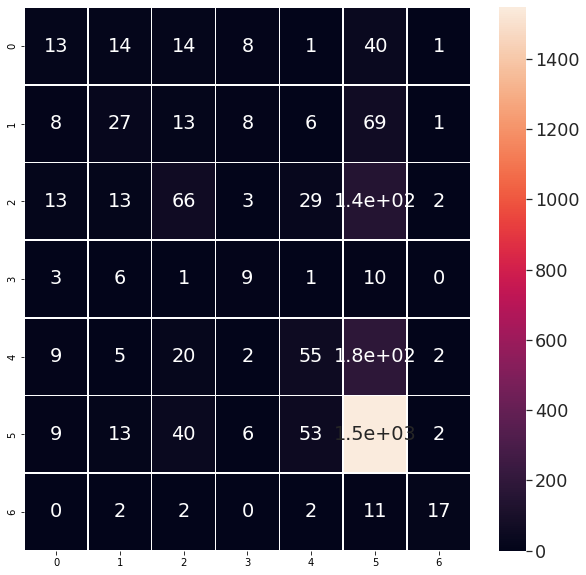

In [52]:
cm = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [53]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

incorr_fraction = incorr_fraction.tolist()

incorr_fraction = [round(item, 2) for item in incorr_fraction]

incorr_fraction

[0.86, 0.8, 0.76, 0.7, 0.8, 0.07, 0.5]

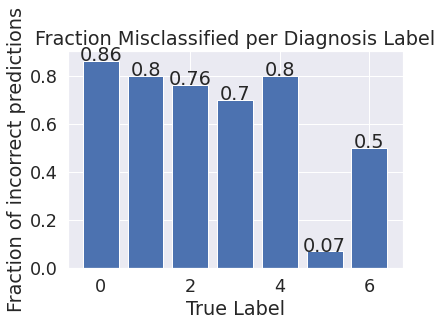

In [54]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
  plt.bar(np.arange(7), incorr_fraction)
  addlabels(np.arange(7), incorr_fraction)
  plt.title("Fraction Misclassified per Diagnosis Label")
  plt.xlabel('True Label')
  plt.ylabel('Fraction of incorrect predictions')